# Class will start at 6:05 PM

In the meantime... fun fact!

- Chat GPT and other Large Language Models (LLM)

# Week 4: Regression models continuation and classification models
### Intro to Machine Learning | Professional Certificate course 

Viviana Marquez,  M.Sc.<br>
March 15, 2023

<br>

<img src='../img/all/di.jpeg' style='width:500px; float: left; margin: 0px 30px 15px 0px'>

# 🚀 Today's agenda

**Part 1:**

- Regression models continuation 
    - Linear regression recap
    - Performance metrics: RMSE and R-Squared
    - Regularized models

# 🚀 Today's agenda

**Part 2:**
- Intro to classification models
- Performance metrics for classification models

# ⏪ Last class recap

- Data pre-processing: Data cleaning and Feature Engineering 
    - Note: Your Exploratory Data Analysis should give your data pre-processing 

<br>

- Bias-variance trade-off: We want both low bias and low variance but when one goes down, the other one goes up. Your task is to find the optimum model complexity. 
    - High Bias: Model is inaccurate on training set (too simple)
    - High Variance: Model is too good on training set, but inaccurate on test set (aka doesn't generalize well, too complex)

<br>

- Intro to Linear Regression

### Conda environment commands

- `conda activate IntroML`
    - Launch `jupyter notebook`
    
    
### Alternative

Google Colab: https://colab.research.google.com/

# 🚀 Part 1

# ❇️ Regression models continuation

# 🗺️📍 Guide map 

<center>
    <img src='../img/class_3/reg.png' style='height:550px; float: center; margin: 0px 0px 0px 0px'>
</center>
    



# Linear regression

- It's the most famous regression model and perhaps the most famous one of machine learning

- 2 min review: https://www.youtube.com/watch?v=CtsRRUddV2s&ab_channel=VisuallyExplained

## Let's work with HW3 data

- Download data [here](https://www.kaggle.com/datasets/mirichoi0218/insurance?datasetId=13720&sortBy=voteCount&select=insurance.csv) or [here](https://raw.githubusercontent.com/vivianamarquez/Intro-to-Machine-Learning/main/data/insurance.csv)

In [1]:
import pandas as pd

df = pd.read_csv("../data/insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# 🗺️📍 Guide map 

<br>
<center>
    <img src='../img/class_0/pipeline.png' style='height:350px;'>
</center>
    



# EDA

In [2]:
df.shape # rows, columns 

(1338, 7)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [9]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [10]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


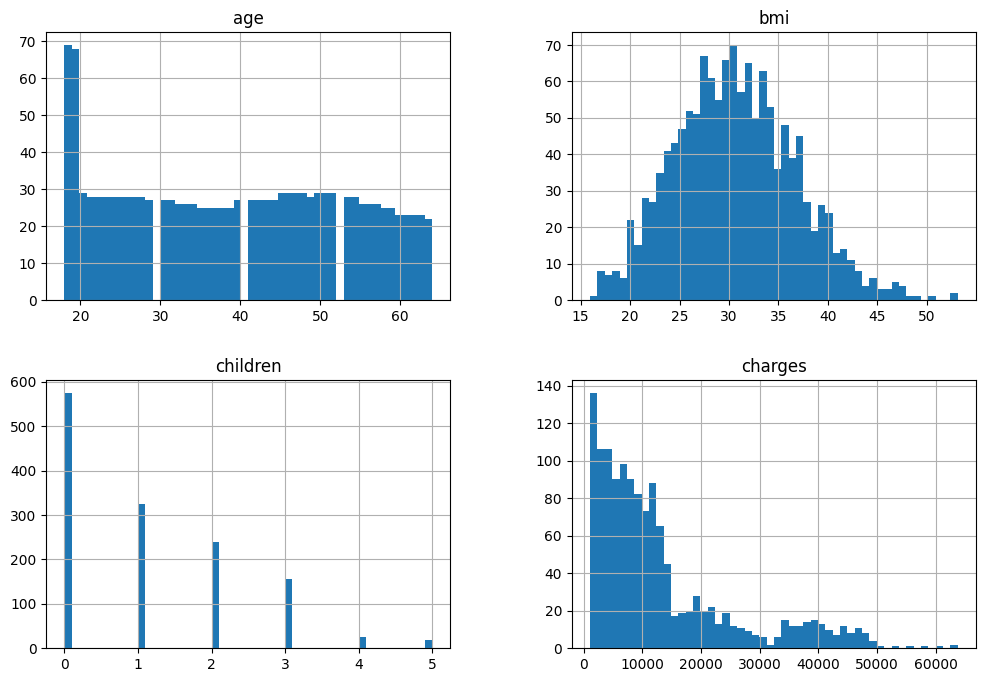

In [11]:
import matplotlib.pyplot as plt

df.hist(bins=50, figsize=(12,8))
plt.show()

In [15]:
df.sex.value_counts()

male      676
female    662
Name: sex, dtype: int64

In [16]:
df.region.value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [18]:
df.smoker.value_counts(normalize=True)

no     0.795217
yes    0.204783
Name: smoker, dtype: float64

In [24]:
df.groupby(by=['smoker']).agg(['mean'])

/var/folders/n7/q93jwpcs6jndz6qqvj4mhtcm0000gn/T/ipykernel_1322/692517224.py:1: FutureWarning: ['sex', 'region'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df.groupby(by=['smoker']).agg(['mean'])


,age,bmi,children,charges
,mean,mean,mean,mean
smoker,,,,
no,39.385338,30.651795,1.090226,8434.268298
yes,38.514599,30.708449,1.113139,32050.231832


In [34]:
var = "age"
df_grouped = df.groupby(by=[var]).agg(['mean'])
df_grouped.columns = df_grouped.columns.to_flat_index()
df_grouped = df_grouped.reset_index()
df_grouped.head()

/var/folders/n7/q93jwpcs6jndz6qqvj4mhtcm0000gn/T/ipykernel_1322/1660744289.py:2: FutureWarning: ['sex', 'smoker', 'region'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df_grouped = df.groupby(by=[var]).agg(['mean'])


,age,"(bmi, mean)","(children, mean)","(charges, mean)"
0,18,31.326159,0.449275,7086.217556
1,19,28.596912,0.426471,9747.909335
2,20,30.632759,0.862069,10159.697736
3,21,28.185714,0.785714,4730.464330
4,22,31.087679,0.714286,10012.932802


<Axes: xlabel='age', ylabel='(charges, mean)'>

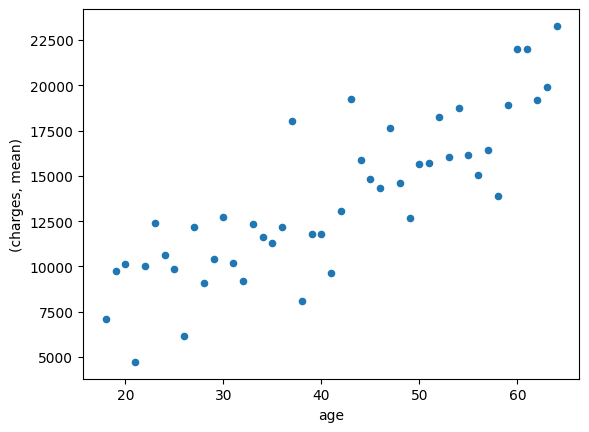

In [35]:
# maybe I could bucket age?
df_grouped.plot.scatter(x=var, y=df_grouped.columns[-1])

In [39]:
df.corr().round(2).style.background_gradient(cmap='coolwarm')

/var/folders/n7/q93jwpcs6jndz6qqvj4mhtcm0000gn/T/ipykernel_1322/383199709.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr().round(2).style.background_gradient(cmap='coolwarm')


,age,bmi,children,charges
age,1.000000,0.110000,0.040000,0.300000
bmi,0.110000,1.000000,0.010000,0.200000
children,0.040000,0.010000,1.000000,0.070000
charges,0.300000,0.200000,0.070000,1.000000


# Data pre-processing: Data cleaning and feature engineering

In [86]:
from sklearn.model_selection import train_test_split

X = df.drop(['charges'], axis=1)
y = df[['charges']]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
X_train

,age,sex,bmi,children,smoker,region
560,46,female,19.950,2,no,northwest
1285,47,female,24.320,0,no,northeast
1142,52,female,24.860,0,no,southeast
969,39,female,34.320,5,no,southeast
486,54,female,21.470,3,no,northwest
...,...,...,...,...,...,...
1095,18,female,31.350,4,no,northeast
1130,39,female,23.870,5,no,southeast
1294,58,male,25.175,0,no,northeast
860,37,female,47.600,2,yes,southwest


# 👮‍♀️ Check-in

Why do we split our data into train/val/test before doing data pre-processing?

- Prevent your model from overfitting 
- Accurately evaluate your model
- Avoid data leakage (no peeking! 👀 By pretending we've never seen the test data we can truly know how our model will perform in unseen data)

In [53]:
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

num_pipeline = make_pipeline(MinMaxScaler())

cat_pipeline = make_pipeline(OneHotEncoder(handle_unknown='ignore'))

preprocessing = make_column_transformer(
(num_pipeline, make_column_selector(dtype_include=np.number)),
(cat_pipeline, make_column_selector(dtype_include=object))
)

In [58]:
X_train_processed = pd.DataFrame(preprocessing.fit_transform(X_train),
             columns = preprocessing.get_feature_names_out(),
             index=X_train.index)
X_train_processed

,pipeline-1__age,pipeline-1__bmi,pipeline-1__children,pipeline-2__sex_female,pipeline-2__sex_male,pipeline-2__smoker_no,pipeline-2__smoker_yes,pipeline-2__region_northeast,pipeline-2__region_northwest,pipeline-2__region_southeast,pipeline-2__region_southwest
560,0.608696,0.107345,0.4,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1285,0.630435,0.224913,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1142,0.739130,0.239440,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
969,0.456522,0.493947,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
486,0.782609,0.148238,0.6,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1095,0.000000,0.414044,0.8,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1130,0.456522,0.212806,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1294,0.869565,0.247915,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
860,0.413043,0.851224,0.4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [59]:
X_train.head()

,age,sex,bmi,children,smoker,region
560,46,female,19.95,2,no,northwest
1285,47,female,24.32,0,no,northeast
1142,52,female,24.86,0,no,southeast
969,39,female,34.32,5,no,southeast
486,54,female,21.47,3,no,northwest


# 👮‍♀️ Check-in

Why did we use One Hot Encoder instead of Ordinal Encoder for the categorical variables?

- Because the Ordinal Encoder assumes two nearby values are more similar to each other (useful for ordered categories such as "bad", "average", "good", "excellent")
- One Hot Encoder returns a binary column for each one of the labels in the categorical column

# 👮‍♀️ Check-in

Why do we use `fit()` and `fit_transform()` only on training data?

- Because we want to **learn the parameters** (fit) of scaling on the train data and **scale** (transform) on the train data. 
- We use `transform()` on the test data because we use the scaling parameters learned on the train data to avoid data leakage. 

# 🗺️📍 Guide map 

<br>
<center>
    <img src='../img/class_3/pipeline_train.png' style='height:350px;'>
</center>
    



# Intuition behind using linear regression

- If we buy one Starbucks Grande coffee for `$2.10` we know that if we buy our friend one too, it will cost us `$4.20`. The cost depends linearly on the number of cups we purchase.

$$ total = 2.10 + 2.10 \times (\text{number of friends}) $$ 

$$ y = \beta_0 + \beta_1 X_1 $$ 

# Machine Learning making our life easier

In [65]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train_processed, y_train)

LinearRegression()

In [75]:
X_test_processed = pd.DataFrame(preprocessing.transform(X_test),
            columns = preprocessing.get_feature_names_out(),
            index=X_test.index)

predictions = lin_reg.predict(X_test_processed)             

In [79]:
predictions = pd.DataFrame(predictions, columns=['predictions'], index=X_test.index)
predictions.head()

,predictions
764,8969.550274
887,7068.747443
890,36858.410912
1293,9454.678501
259,26973.173457


In [80]:
y_test.head()

,charges
764,9095.06825
887,5272.17580
890,29330.98315
1293,9301.89355
259,33750.29180


#### Coefficients  

<br>
<center>
    <img src='../img/class_3/lr_formula.png' style='height:300px; float: center; margin: 0px 0px 0px 0px'><br>
</center>


- A positive coefficient indicates that as the value of the independent variable increases, the mean of the dependent variable also tends to increase.

- A negative coefficient suggests that as the independent variable increases, the dependent variable tends to decrease.
- Your goal with linear regression is finding those optimal coefficients

In [87]:
lin_reg.intercept_

array([9431.02412155])

In [94]:
pd.DataFrame(lin_reg.coef_.T,
             index=X_train_processed.columns,
             columns=['Coefficient'])

,Coefficient
pipeline-1__age,11820.882468
pipeline-1__bmi,12529.730156
pipeline-1__children,2126.393918
pipeline-2__sex_female,9.295846
pipeline-2__sex_male,-9.295846
pipeline-2__smoker_no,-11825.564428
pipeline-2__smoker_yes,11825.564428
pipeline-2__region_northeast,459.585244
pipeline-2__region_northwest,88.907918
pipeline-2__region_southeast,-198.279052


# ❇️ Performance metrics

# 🤔 How do I know if my model is good? 

<br>
<center>
    <img src='../img/class_4/err.webp' style='height:550px; float: center; margin: 0px 0px 0px 0px'><br>
</center>

- Linear Regression tries to fit a line that produces the smallest difference between predicted and actual values. This difference error is also known as residual.

$$e=y-\hat{y}$$

- **Performance metrics** are a measure of how good a model predicts values.

- Some linear regression metrics:
    - MSE: Mean Square Error
    - MAE: Mean Absolute Error
    - RMSE: Root Mean Square Error
    - R-squared
    - Adjusted R-Square

# RMSE: Root Mean Square Error

$$RMSE = \sqrt{\dfrac{\sum^{N}_{i=1}||y_i-\hat{y}_i||^2}{N}}$$

where $N$ is the number of data points, $y_i$ is the i-th observation and $\hat{y}_i$ is the corresponding prediction

- It shows how far predictions fall from measured true values using Euclidean distance


In [102]:
from sklearn.metrics import mean_squared_error

np.sqrt(mean_squared_error(y_test.charges.values, predictions.predictions.values))

5796.2846592762735

In [103]:
df.charges.describe()

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

### 🤔 What does this number mean?

- A large RMSE generally means our model is failing to account for important features underlying our data

- You want a small RMSE

### 🤔 What does it mean for RMSE to be small?

- It depends on our choice of units and the specific application we are hoping for. (Example: 100 nanometers vs 100 kilometers)

- ⚠️ RMSE penalizes large errors (i.e. sensitive to outliers)
- ⚠️ RMSE increases with an increase in the size of the test sample

# R-Squared

$$R^2 = 1 - \dfrac{\text{Sum of Square Error}}{\text{Sum of Square Total}}$$

- How much of the variance of the outcome is explained by the model attributes?


In [104]:
from sklearn.metrics import r2_score

r2_score(y_test.charges.values, predictions.predictions.values)

0.7835929767120723

- R-Squared goes from 0 to 1


- Interpretation: Our attributes explain 78% of the variance in insurance price


- We want this number to be as close to 1 as possible

# 🤔 RMSE vs. R2: Which Metric Should You Use?

- It's useful to calculate both the $RMSE$ and the $R^2$ value because each metric tells us something different

- $RMSE$: the typical distance between the predicted value made by the regression model and the actual value

- $R^2$: how well the predictor variables can explain the variation in the response variable

# 🤔 How can I get a better result?

<br>
<center>
    <img src='../img/class_0/pipeline.png' style='height:200px;'>
</center>
    



1. Add more data

2. Treat missing and outlier values

3. Feature Engineering 

# 🤔 How can I get a better result?

<br>
<center>
    <img src='../img/class_0/pipeline.png' style='height:200px;'>
</center>
    



4. Feature Selection (Week 6)

5. Hyperparameter tunning (Week 6)

6. Ensemble methods (Week 5)

7. Cross Validation (Week 6)

# 🤔 How can I get a better result?

<br>
<center>
    <img src='../img/class_0/pipeline.png' style='height:200px;'>
</center>
    



8. Try different models (Now)

# See you at @ 8:10 PM oops typo
## Feel free to put questions in the chat :) 

# ❇️ Regularized models

# Regularization



- Regularization is the process of introducing additional information to minimize overfitting

- Regularization discourages unnecessary complexity

- When there is insufficient data, regularization stabilizes our models

# One way to regularize: Add a constraint to the loss function



- Loss function: Evaluating how well your algorithm is modeling your dataset

- The loss function for linear regression is

$$SSE = \sum^{n}_{i=1} (y_i - \hat{y}_i)2$$

- Regularized loss = Loss function + Constraint

# Lasso regression a.k.a. L1 regularization

$$SSE = \sum^{n}_{i=1} (y_i - \hat{y}_i)2 + L1$$

$$L1: \lambda \sum^{m}_{j=1}|w_j|$$


- Shrink the weights using the absolute values of the weight coefficients

- The effect: Penalize large coefficients-- large coefficients increase the size of the total error function 

In [106]:
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(X_train_processed, y_train)

print(f"Intercept: {lasso.intercept_}")
coeff_df = pd.DataFrame(lasso.coef_.T, X_train_processed.columns, columns=['coeff'])
coeff_df.round(2)

Intercept: [21075.90171973]


,coeff
pipeline-1__age,11813.07
pipeline-1__bmi,12486.52
pipeline-1__children,2110.40
pipeline-2__sex_female,13.71
pipeline-2__sex_male,-0.00
pipeline-2__smoker_no,-23644.12
pipeline-2__smoker_yes,0.00
pipeline-2__region_northeast,646.60
pipeline-2__region_northwest,275.98
pipeline-2__region_southeast,-0.00


Spoilers alert: L1 forces features to have zero as coefficients, therefore, lasso is used for feature selection

In [107]:
predictions = lasso.predict(X_test_processed)
predictions = pd.DataFrame(predictions, columns=['predictions'], index=X_test.index)
predictions.head()

,predictions
764,8965.606167
887,7067.155101
890,36848.696059
1293,9451.645934
259,26970.128762


In [108]:
rmse = np.sqrt(mean_squared_error(y_test.charges.values, predictions.predictions.values))
r2 = r2_score(y_test.charges.values, predictions.predictions.values)

print(f"RMSE: {rmse}")
print(f"R-Squared: {r2}")

RMSE: 5797.208460486576
R-Squared: 0.783523990106689


# Ridge regression a.k.a. L2 regularization

$$SSE = \sum^{n}_{i=1} (y_i - \hat{y}_i)2 + L2$$

$$L2: \lambda \sum^{n}_{j=1}w^2_j$$


- Shrink the weights by computing the Euclidean norm of the weight coefficients (the weight vector )

In [110]:
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(X_train_processed, y_train)

print(f"Intercept: {ridge.intercept_}")
coeff_df = pd.DataFrame(ridge.coef_.T, X_train_processed.columns, columns=['Coefficient']).round(2)
coeff_df

Intercept: [9630.81778818]


,Coefficient
pipeline-1__age,11727.99
pipeline-1__bmi,12087.04
pipeline-1__children,2102.45
pipeline-2__sex_female,5.91
pipeline-2__sex_male,-5.91
pipeline-2__smoker_no,-11788.52
pipeline-2__smoker_yes,11788.52
pipeline-2__region_northeast,439.24
pipeline-2__region_northwest,74.07
pipeline-2__region_southeast,-165.73


In [111]:
predictions = ridge.predict(X_test_processed)
predictions = pd.DataFrame(predictions, columns=['predictions'], index=X_test.index)
predictions.head()

,predictions
764,9008.809159
887,7083.560180
890,36779.935749
1293,9492.615127
259,26932.371325


In [112]:
rmse = np.sqrt(mean_squared_error(y_test.charges.values, predictions.predictions.values))
r2 = r2_score(y_test.charges.values, predictions.predictions.values)

print(f"RMSE: {rmse}")
print(f"R-Squared: {r2}")

RMSE: 5799.731530984331
R-Squared: 0.7833355190198367


# 🚀 Part 2

See you here at @

# ❇️ Intro to classification models

# Regressor vs Classifier; 2 sides of the same coin
<br>
<center>
    <img src='../img/class_3/reg_class.png' style='height:400px; float: center; margin: 0px 0px 0px 0px'>
</center>

# 🗺️📍 Guide map 

<center>
    <img src='../img/class_1/classification.png' style='height:550px; float: center; margin: 0px 0px 0px 0px'>
</center>
    



# Classification models

There are three types of classification models:

- Binary
- Multiclass
- Multilabel

### Classification models

**Binary:** Classify two classes

<center><img src='../img/class_4/classf1.png' style='height:600px; float: center; margin: 0px 0px 0px 0px'></center>

### Classification models

**Multiclass:** Classify more than two classes

<center><img src='../img/class_4/classf2.png' style='height:600px; float: center; margin: 0px 0px 0px 0px'></center>

### Classification models

**Multilabel:** When a single observation has more than one label

<br>
<center><img src='../img/class_4/catdog.png' style='height:600px; float: center; margin: 0px 0px 0px 0px'></center>

# 👮‍♀️ Check-in

What other problems are examples of multilabel classification?

# ❇️ Performance metrics for classification models

# Some performance metrics for classification models

- Accuracy
- Precision 
- Recall
- F1-score 
- ROC curve

# When using a classification model for prediction, you can get two results 

<br>
<center><img src='../img/class_4/right_wrong.png' style='height:300px; float: center; margin: 0px 0px 0px 0px'></center>

- Correct 
- Incorrect

# Accuracy

- The number of correct predictions divided by the total number of predictions

<br>
<center><img src='../img/class_4/acc.png' style='height:280px; float: center; margin: 0px 0px 0px 0px'></center>



- Accuracy $= \dfrac{7}{10} = 0.7$ or 70% accurate

# Issues with accuracy

- It needs a balanced data set 

<br>
<center><img src='../img/class_4/acc2.png' style='height:280px; float: center; margin: 0px 0px 0px 0px'></center>



- Accuracy $\dfrac{9}{10} = 0.9$ or 90% accurate

# Recall

- The ability of the model to retrieve **all** relevant cases within a data set 

<br>
<center><img src='../img/class_4/acc.png' style='height:280px; float: center; margin: 0px 0px 0px 0px'></center>



- Let `dog` be true positive (TP) and `cat` be true negative (TN)


- Recall $= \dfrac{\text{TP}}{\text{TP}+\text{FN}} = \dfrac{\text{TP}}{\text{everything that is actually positive}} = \dfrac{2}{3} = \text{67% recall}$ 

# Precision

- The ability of the model to find **only** the relevant cases within a data set

<br>
<center><img src='../img/class_4/acc.png' style='height:280px; float: center; margin: 0px 0px 0px 0px'></center>



- Precision $= \dfrac{\text{TP}}{\text{TP}+\text{FP}} = \dfrac{\text{TP}}{\text{everything that got classified as positive}} = \dfrac{2}{4} = \text{50% precision}$ 

# F1

- It is used to find an optimal balance between precision and recall

<br>
<center><img src='../img/class_4/acc.png' style='height:280px; float: center; margin: 0px 0px 0px 0px'></center>



- $F_1 = 2 \cdot \dfrac{\text{precision}\cdot\text{recall}}{\text{precision}+\text{recall}} = 2 \cdot \dfrac{(2/3)\cdot(2/4)}{(2/3)+(2/4)} = \dfrac{4}{7} = 57\%$

# When using a classification model for prediction, you can get two results: 

- Correct 
- Incorrect

That means that you end up with four groups (in a binary classification):

- Correct classification `class 1`: True Positive (TP)
<img src='../img/class_4/TP.png' style='height:120px; float: center; margin: 0px 15px 15px 0px'>
- Correct classification `class 2`: True Negative (TN)
<img src='../img/class_4/TN.png' style='height:120px; float: center; margin: 0px 15px 15px 0px'>
- Incorrect classification `class 2`: False Positive (FP)
<img src='../img/class_4/FP.png' style='height:120px; float: center; margin: 0px 15px 15px 0px'>
- Incorrect classification `class 1`: False Negative (FN)
<img src='../img/class_4/FN.png' style='height:120px; float: center; margin: 0px 15px 15px 0px'>

# Confusion matrix

- Tool that helps visualize the performance of a classification model
- The name stems from the fact that it makes it easy to see whether the system is confusing two classes

<center><img src="../img/class_4/conf_matrix.png" style='height:600px; float: center; margin: 0px 0px 0px 0px'></center>

# Exercise

<center><img src="../img/class_4/conf_matrix2.png" style='height:450px; float: center; margin: 0px 0px 0px 0px'></center>
<br>
<center><img src='../img/class_4/acc.png' style='height:200px; float: center; margin: 0px 0px 0px 0px'></center>

<center><img src="../img/class_4/pregnant.jpeg" style='height:500px; float: center; margin: 0px 0px 0px 0px'></center>

<br>

- The main purpose of the confusion matrix is to obtain measures to compare the predicted values with the true values
- What constitutes a "good" measure depends on the situation

# More classification performance metrics

- Terminology and derivations from a confusion matrix: [here](https://en.wikipedia.org/wiki/Precision_and_recall)
- ROC (Receiver Operator Characteristic) graphs and AUC (the area under the curve): [here](https://www.youtube.com/watch?v=4jRBRDbJemM&ab_channel=StatQuestwithJoshStarmer)

# ⏪ Today's recap

- Regression models continuation 
    - Linear regression recap
    - Performance metrics: RMSE and R-Squared
    - Regularized models
    
- Intro to classification models
- Performance metrics for classification models
    - TP/TN/FP/FN
    - Accuracy (careful of unbalanced datasets!)
    - Precision and Recall
    - F1: Optimal balance between precision and recall
    - Confusion matrix: Tool to obtain measures to compare the predicted values with the true values
    - ROC/AUC [this video is highly encouraged](https://www.youtube.com/watch?v=4jRBRDbJemM&ab_channel=StatQuestwithJoshStarmer)

# 👮‍♀️ Misc:

- Self-graded quiz will be posted in the next hour
- 💪 Ungraded homework will be posted tonight or tomorrow morning
- Office hours on Friday at 12 PM PST and Monday 6 PM PST (Zoom link is posted in Canvas) 
- 🤝 Networking: https://usfca.instructure.com/courses/1613920/discussion_topics/8157912?module_item_id=17968302 

### Check-in: https://forms.gle/iPGEKNwJP1c8ftSp8

<center>
<img src='../img/all/bye.gif' style='height:400px;'> 
</center>

# Next class: 
- Classification models continuation
- Non-parametric models
- Ensemble models